# Support Vector Regression (SVR)

## Importing the libraries

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [17]:
# We need feature scaling as there is no explicit formula to compensate for size of features
dataset = pd.read_csv("Position_Salaries.csv")
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2:3].values

In [18]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [19]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
y_sc = StandardScaler()
x = x_sc.fit_transform(x)
y = y_sc.fit_transform(y)

In [21]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [22]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf") # Radial basis formula
regressor.fit(x,y)

/Users/jielanzheng/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [26]:
y_sc.inverse_transform(regressor.predict(x_sc.transform([[6.5]])).reshape(-1,1))


array([[170370.0204065]])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

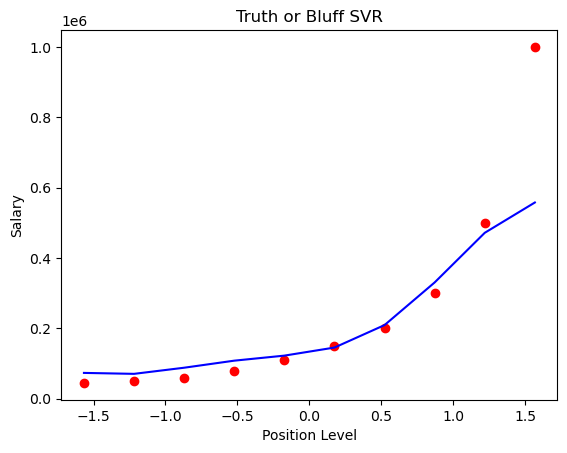

In [36]:
plt.scatter(x_sc.inverse_transform(x), y_sc.inverse_transform(y), color = "red")
plt.plot(x_sc.inverse_transform(x), y_sc.inverse_transform(regressor.predict((x)).reshape(-1,1)), color = "blue")
plt.title("Truth or Bluff SVR")
plt.xlabel("Position Level")
plt.ylabel("Salary")

## Visualising the SVR results (for higher resolution and smoother curve)

Text(0, 0.5, 'Salary')

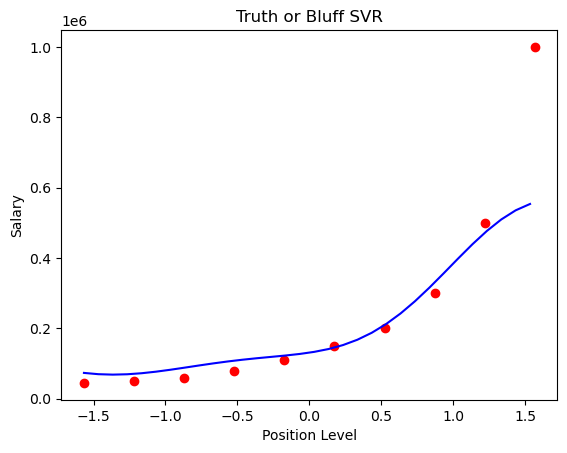

In [37]:
x_grid = np.arange(min(x),max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_sc.inverse_transform(x), y_sc.inverse_transform(y), color = "red")
plt.plot(x_sc.inverse_transform(x_grid), y_sc.inverse_transform(regressor.predict(x_grid).reshape(-1,1)), color = "blue")
plt.title("Truth or Bluff SVR")
plt.xlabel("Position Level")
plt.ylabel("Salary")